# car price prediction 

In [1]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn-v0_8-dark')


In [3]:
# load the dataset
df = pd.read_csv('assets/car_price_prediction.csv')
df = df.dropna()

print("sample data: ")
display(df.sample(5))

print("df shape: ")
display(df.shape)

print("df info: ")
display(df.info())

sample data: 


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
327,Maruti Swift Dzire VDI,2018,800000,25000,Diesel,Individual,Manual,First Owner
316,Hyundai Verna CRDi 1.6 EX,2018,900000,24000,Diesel,Individual,Manual,First Owner
4067,Hyundai Verna 1.6 CRDi AT SX,2017,1050000,31000,Diesel,Dealer,Automatic,First Owner
2843,Honda Amaze VX i-VTEC,2018,800000,13500,Petrol,Dealer,Manual,First Owner
2226,Hyundai EON D Lite,2016,210000,30000,Petrol,Individual,Manual,First Owner


df shape: 


(4340, 8)

df info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


None

In [4]:
# data pre-processing
df['age'] = 2024 - df['year']
df.drop('year',axis=1,inplace = True)



In [5]:
# data preparation
df.drop(labels='name',axis= 1, inplace = True)
display(df.head(5))

df = pd.get_dummies(data = df,drop_first=True) 
display(df.head(5))


,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,17
1,135000,50000,Petrol,Individual,Manual,First Owner,17
2,600000,100000,Diesel,Individual,Manual,First Owner,12
3,250000,46000,Petrol,Individual,Manual,First Owner,7
4,450000,141000,Diesel,Individual,Manual,Second Owner,10


,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,17,False,False,False,True,True,False,True,False,False,False,False
1,135000,50000,17,False,False,False,True,True,False,True,False,False,False,False
2,600000,100000,12,True,False,False,False,True,False,True,False,False,False,False
3,250000,46000,7,False,False,False,True,True,False,True,False,False,False,False
4,450000,141000,10,True,False,False,False,True,False,True,False,True,False,False


In [6]:
# train test split
y = df['selling_price']
X = df.drop('selling_price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3472, 13)
x test:  (868, 13)
y train:  (3472,)
y test:  (868,)


In [7]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

    

## standard linear regression model

Train R2-score : 0.45
Test R2-score : 0.5
Train CV scores : [0.42960817 0.48108577 0.38382841 0.43316624 0.52284773]
Train CV mean : 0.45


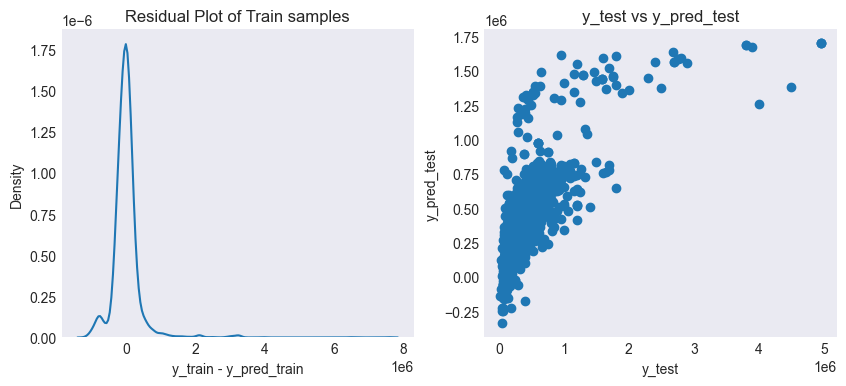

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

## ridge regression model

Train R2-score : 0.45
Test R2-score : 0.5
Train CV scores : [0.4264486  0.48166326 0.38359856 0.43600368 0.52137158]
Train CV mean : 0.45


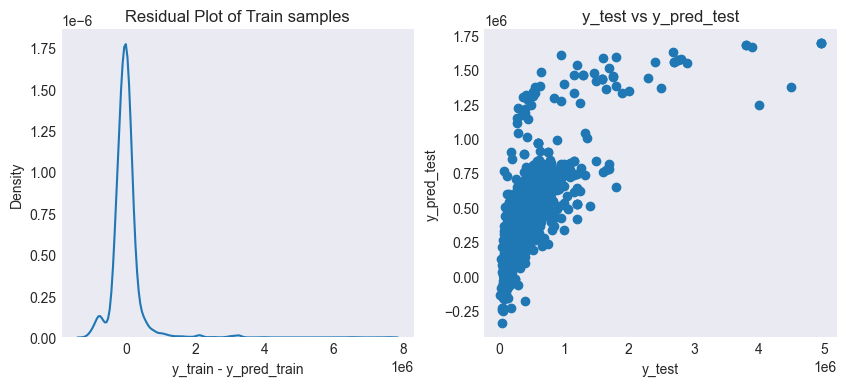

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

rg = Ridge()
alpha = np.logspace(-3,3,num=14)
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

## lasso regression model

Train R2-score : 0.45
Test R2-score : 0.5
Train CV scores : [0.42959642 0.48109984 0.38372852 0.43323764 0.52198926]
Train CV mean : 0.45


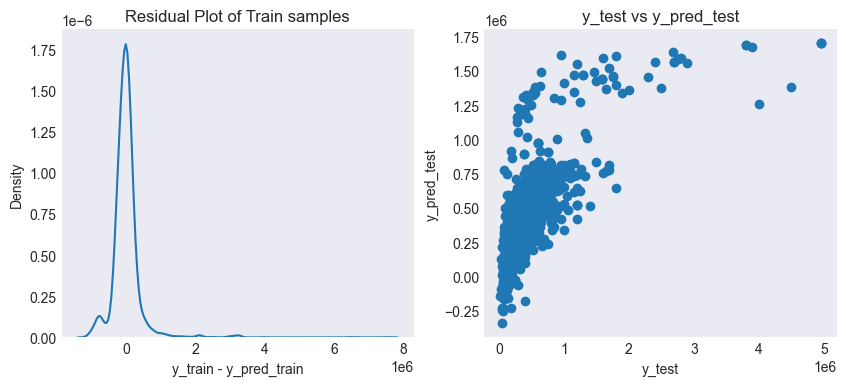

In [10]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

car_pred_model(ls_rs,"lasso.pkl")

## random forest regression model

Train R2-score : 0.76
Test R2-score : 0.75
Train CV scores : [0.6056341  0.71526404 0.47668728 0.6642639  0.70005318]
Train CV mean : 0.63


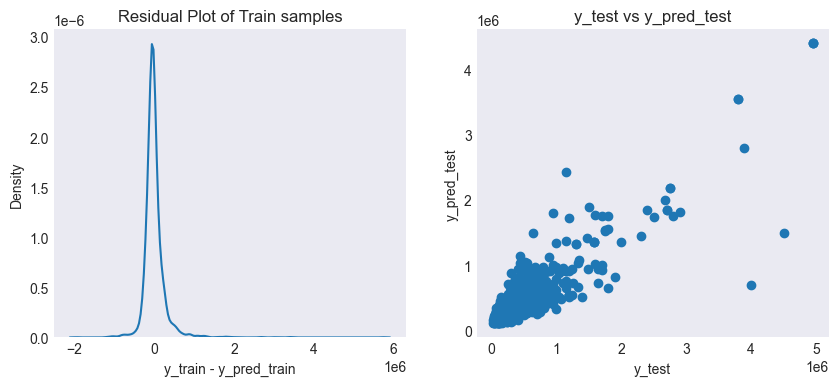

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=4,
                      n_estimators=500)


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

car_pred_model(rf_rs,"random_forest.pkl")

print(rf_rs.best_estimator_)

## gradient boosting regression model

Train R2-score : 0.8
Test R2-score : 0.77
Train CV scores : [0.59379425 0.69521328 0.46007539 0.63501355 0.69352206]
Train CV mean : 0.62


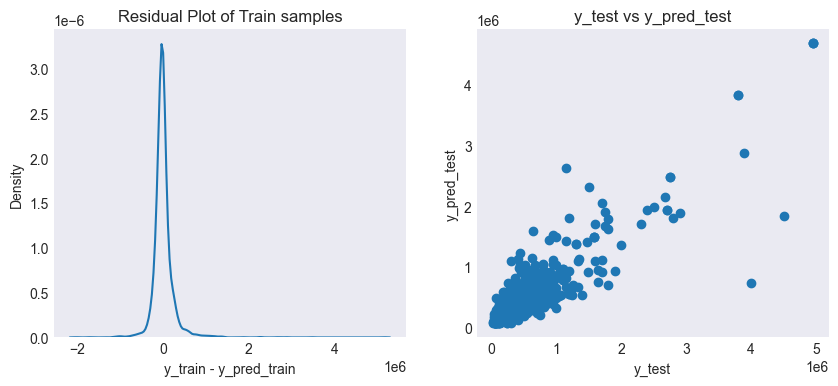

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, max_features='sqrt',
                          min_samples_leaf=5, min_samples_split=6,
                          n_estimators=700)


In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

car_pred_model(gb_rs,"gradient_boost.pkl")

print(gb_rs.best_estimator_)

In [13]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.45,0.50,0.45
1,Ridge,0.45,0.50,0.45
2,Lasso,0.45,0.50,0.45
3,RandomForestRegressor,0.76,0.75,0.63
4,GradientBoostingRegressor,0.80,0.77,0.62
